# Project on Resume Classification

# Business objective:
The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

# A. Text Extraction from Resumes

## A1.Importing Library

In [6]:
!pip install textract
!pip install pandas
!pip install seaborn
!pip install nltk
!pip install wordcloud
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install nltk
!pip install spacy
!pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.1/423.1 kB 8.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.4/492.4 kB 8.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.8/937.8 kB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 11.3 MB/s eta 0:00:00
  Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
  Using cached requests-2.32.3-py3

In [8]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


import warnings
warnings.filterwarnings('ignore')

In [9]:
full_path = 'resumes categorised'
path=os.listdir(full_path)

In [10]:
file_path1 = []
category1  = []
directory1 = full_path

In [11]:

for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        file_name = os.path.splitext(i)[0]
        category1.append(file_name)

In [12]:
import pandas as pd

In [13]:
data1 = pd.read_csv('all_resumes.csv')
data1.columns = ['Raw_Details','Category1']

# A2. Data Understanding

## A2.1 Number of Words in each Resume

In [14]:
data1.isnull().sum()

Raw_Details    0
Category1      0
dtype: int64

In [15]:
data1['Word_Count'] = data1['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
data1[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,917
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,640
2,\n ...,1408
3,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,427
4,\n\nMooraboyina Guravaiah\nWorkday Integration...,1210


## A2.2 Number of Characters

In [16]:
data1['Char_Count'] = data1['Raw_Details'].str.len() ## this also includes spaces
data1[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,6010
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,4289
2,\n ...,5317
3,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,3533
4,\n\nMooraboyina Guravaiah\nWorkday Integration...,6785


## A2.3 Number of Stopwords

In [17]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data1['Stopwords'] = data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
data1[['Raw_Details','Stopwords']]

,Raw_Details,Stopwords
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,215
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,125
2,\n ...,156
3,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,110
4,\n\nMooraboyina Guravaiah\nWorkday Integration...,214
5,VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...,100
6,Rahul (Techno Functional Consultant) \nProfe...,340
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,156
8,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,228
9,Seeking suitable positions in Workday HCM as ...,191


## A2.4 Number of Numerics

In [18]:
data1['Numerics'] = data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data1[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,4
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,1
2,\n ...,2
3,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,3
4,\n\nMooraboyina Guravaiah\nWorkday Integration...,1


In [19]:
data1

,Raw_Details,Category1,Word_Count,Char_Count,Stopwords,Numerics
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,workday resumes,917,6010,215,4
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,workday resumes,640,4289,125,1
2,\n ...,workday resumes,1408,5317,156,2
3,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,workday resumes,427,3533,110,3
4,\n\nMooraboyina Guravaiah\nWorkday Integration...,workday resumes,1210,6785,214,1
5,VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...,workday resumes,493,3930,100,1
6,Rahul (Techno Functional Consultant) \nProfe...,workday resumes,1268,8655,340,7
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday resumes,687,5381,156,1
8,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday resumes,979,7309,228,1
9,Seeking suitable positions in Workday HCM as ...,workday resumes,990,6324,191,6


# A3. Text Pre-Processing

## A3.1 Using Regular Expression

In [20]:
from nltk.tokenize import RegexpTokenizer

In [21]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [22]:
data1['Resume_Details'] = data1.Raw_Details.apply(lambda x: preprocess(x))

## A3.2 Clean Text from Resume

In [23]:
data1

,Raw_Details,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,workday resumes,917,6010,215,4,chinna subbarayudu dob march nationality india...
1,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,workday resumes,640,4289,125,1,name gopi krishna reddy professional summery w...
2,\n ...,workday resumes,1408,5317,156,2,himaja career objective work towards achieving...
3,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,workday resumes,427,3533,110,3,jyoti verma years experience workday functiona...
4,\n\nMooraboyina Guravaiah\nWorkday Integration...,workday resumes,1210,6785,214,1,mooraboyina guravaiah workday integration spec...
5,VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...,workday resumes,493,3930,100,1,venkata saikrishna workday consultant profssio...
6,Rahul (Techno Functional Consultant) \nProfe...,workday resumes,1268,8655,340,7,rahul techno functional consultant professiona...
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday resumes,687,5381,156,1,ramesh workday hcm consultant professional sum...
8,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday resumes,979,7309,228,1,workday hcm fcm name kumar role workday consul...
9,Seeking suitable positions in Workday HCM as ...,workday resumes,990,6324,191,6,seeking suitable positions workday hcm techno ...


## A3.3 Save the Clean Data in new CSV File

In [24]:
data1.drop(['Raw_Details'], axis = 1, inplace = True)
data1

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,workday resumes,917,6010,215,4,chinna subbarayudu dob march nationality india...
1,workday resumes,640,4289,125,1,name gopi krishna reddy professional summery w...
2,workday resumes,1408,5317,156,2,himaja career objective work towards achieving...
3,workday resumes,427,3533,110,3,jyoti verma years experience workday functiona...
4,workday resumes,1210,6785,214,1,mooraboyina guravaiah workday integration spec...
5,workday resumes,493,3930,100,1,venkata saikrishna workday consultant profssio...
6,workday resumes,1268,8655,340,7,rahul techno functional consultant professiona...
7,workday resumes,687,5381,156,1,ramesh workday hcm consultant professional sum...
8,workday resumes,979,7309,228,1,workday hcm fcm name kumar role workday consul...
9,workday resumes,990,6324,191,6,seeking suitable positions workday hcm techno ...


In [25]:
data1.to_csv('Cleaned_Resumes.csv', index = False)

In [26]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,workday resumes,917,6010,215,4,chinna subbarayudu dob march nationality india...
1,workday resumes,640,4289,125,1,name gopi krishna reddy professional summery w...
2,workday resumes,1408,5317,156,2,himaja career objective work towards achieving...
3,workday resumes,427,3533,110,3,jyoti verma years experience workday functiona...
4,workday resumes,1210,6785,214,1,mooraboyina guravaiah workday integration spec...
5,workday resumes,493,3930,100,1,venkata saikrishna workday consultant profssio...
6,workday resumes,1268,8655,340,7,rahul techno functional consultant professiona...
7,workday resumes,687,5381,156,1,ramesh workday hcm consultant professional sum...
8,workday resumes,979,7309,228,1,workday hcm fcm name kumar role workday consul...
9,workday resumes,990,6324,191,6,seeking suitable positions workday hcm techno ...


In [27]:
resume_data.Resume_Details[5]

'venkata saikrishna workday consultant profssional summary years experience workday consultant integral maintenance creation workday supervisory organizations business process locations positions company cost centers hierarchies experience understanding client business requirements organizational hierarchy setup configurable security setup tenant setup worked different staffing models defining hire restrictions job management position management hands experience compensation module like creating compensation grades compensation eligibility rules allowance plans salary plans hourly plans experience creating job profiles job families job family group experience workday security groups like role based security user based security intersection job based security experience creating staffing models supervisory orgs reorganizations business process framework organization types organization hierarchies strong experience workday report writer custom reporting calculated fields advanced standar

# A4. Named Entity Recognition (NER)

In [28]:
import nltk
# nltk.download('punkt')

In [29]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 309), ('using', 241), ('workday', 194), ('application', 186), ('sql', 178), ('project', 168), ('server', 168), ('data', 167), ('reports', 164), ('business', 156), ('peoplesoft', 156), ('knowledge', 129), ('web', 125), ('process', 120), ('react', 116), ('good', 103), ('skills', 100), ('involved', 96), ('working', 96), ('system', 96), ('various', 95), ('client', 94), ('creating', 94), ('like', 93), ('worked', 92), ('support', 91), ('integrations', 90), ('development', 88), ('database', 86), ('tools', 84), ('technical', 84), ('servers', 83), ('integration', 81), ('hcm', 78), ('developer', 78), ('design', 76), ('created', 75), ('report', 74), ('used', 74), ('people', 71), ('work', 70), ('testing', 69), ('responsibilities', 68), ('html', 68), ('services', 67), ('team', 67), ('custom', 66), ('new', 66), ('user', 64), ('developed', 63)]


# A5. Parts Of Speech (POS) Tagging

In [30]:
import spacy

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:05
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [31]:
one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [32]:
for token in doc_block[:30]:
    print(token,token.pos_)  

velopment NOUN
testing VERB
implementation NOUN
support NOUN
different ADJ
application NOUN
domain NOUN
experience NOUN
working VERB
production NOUN
support NOUN
model NOUN
excellent ADJ
client NOUN
interaction NOUN
skills NOUN
proven VERB
experience NOUN
working VERB
independently ADV
well ADV
team NOUN
technical ADJ
skills NOUN
education NOUN
details NOUN
bsc PROPN
computers NOUN
yogi PROPN
vemana PROPN


## A5.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [33]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['summary', 'years', 'experience', 'developing', 'implementation', 'erp', 'technology', 'using', 'workday', 'years', 'experience', 'workday', 'integration', 'consultant', 'involved', 'maintenance', 'implementation', 'experience', 'phases', 'workday', 'requirements', 'gathering', 'analysis', 'design', 'development', 'testing', 'hands', 'experience', 'inbound', 'outbound', 'integrations', 'using', 'core', 'connector', 'workday', 'studio', 'managing', 'business', 'processes', 'working', 'eib', 'report', 'developed', 'maintained', 'custom', 'report', 'types', 'matrix', 'composite', 'using', 'report', 'writer', 'tool', 'involved', 'presenting', 'data', 'web', 'services', 'building', 'workday', 'integration', 'calculated', 'fields', 'custom', 'reports', 'writing', 'developed', 'testing', 'strategies', 'validation', 'scenarios', 'project', 'scope', 'requirement', 'documents', 'prioritizing', 'reproducing', 'verifying', 'bug', 'fixes', 'workday', 'integrations', 'web', 'service', 'rest', 'web'

## A5.2 Counting all the Nouns and Verbs present in the Tokens of words

In [34]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,280
1,using,233
2,application,185
3,workday,168
4,reports,164
5,data,161
6,project,153
7,business,149
8,web,123
9,process,119


## A5.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

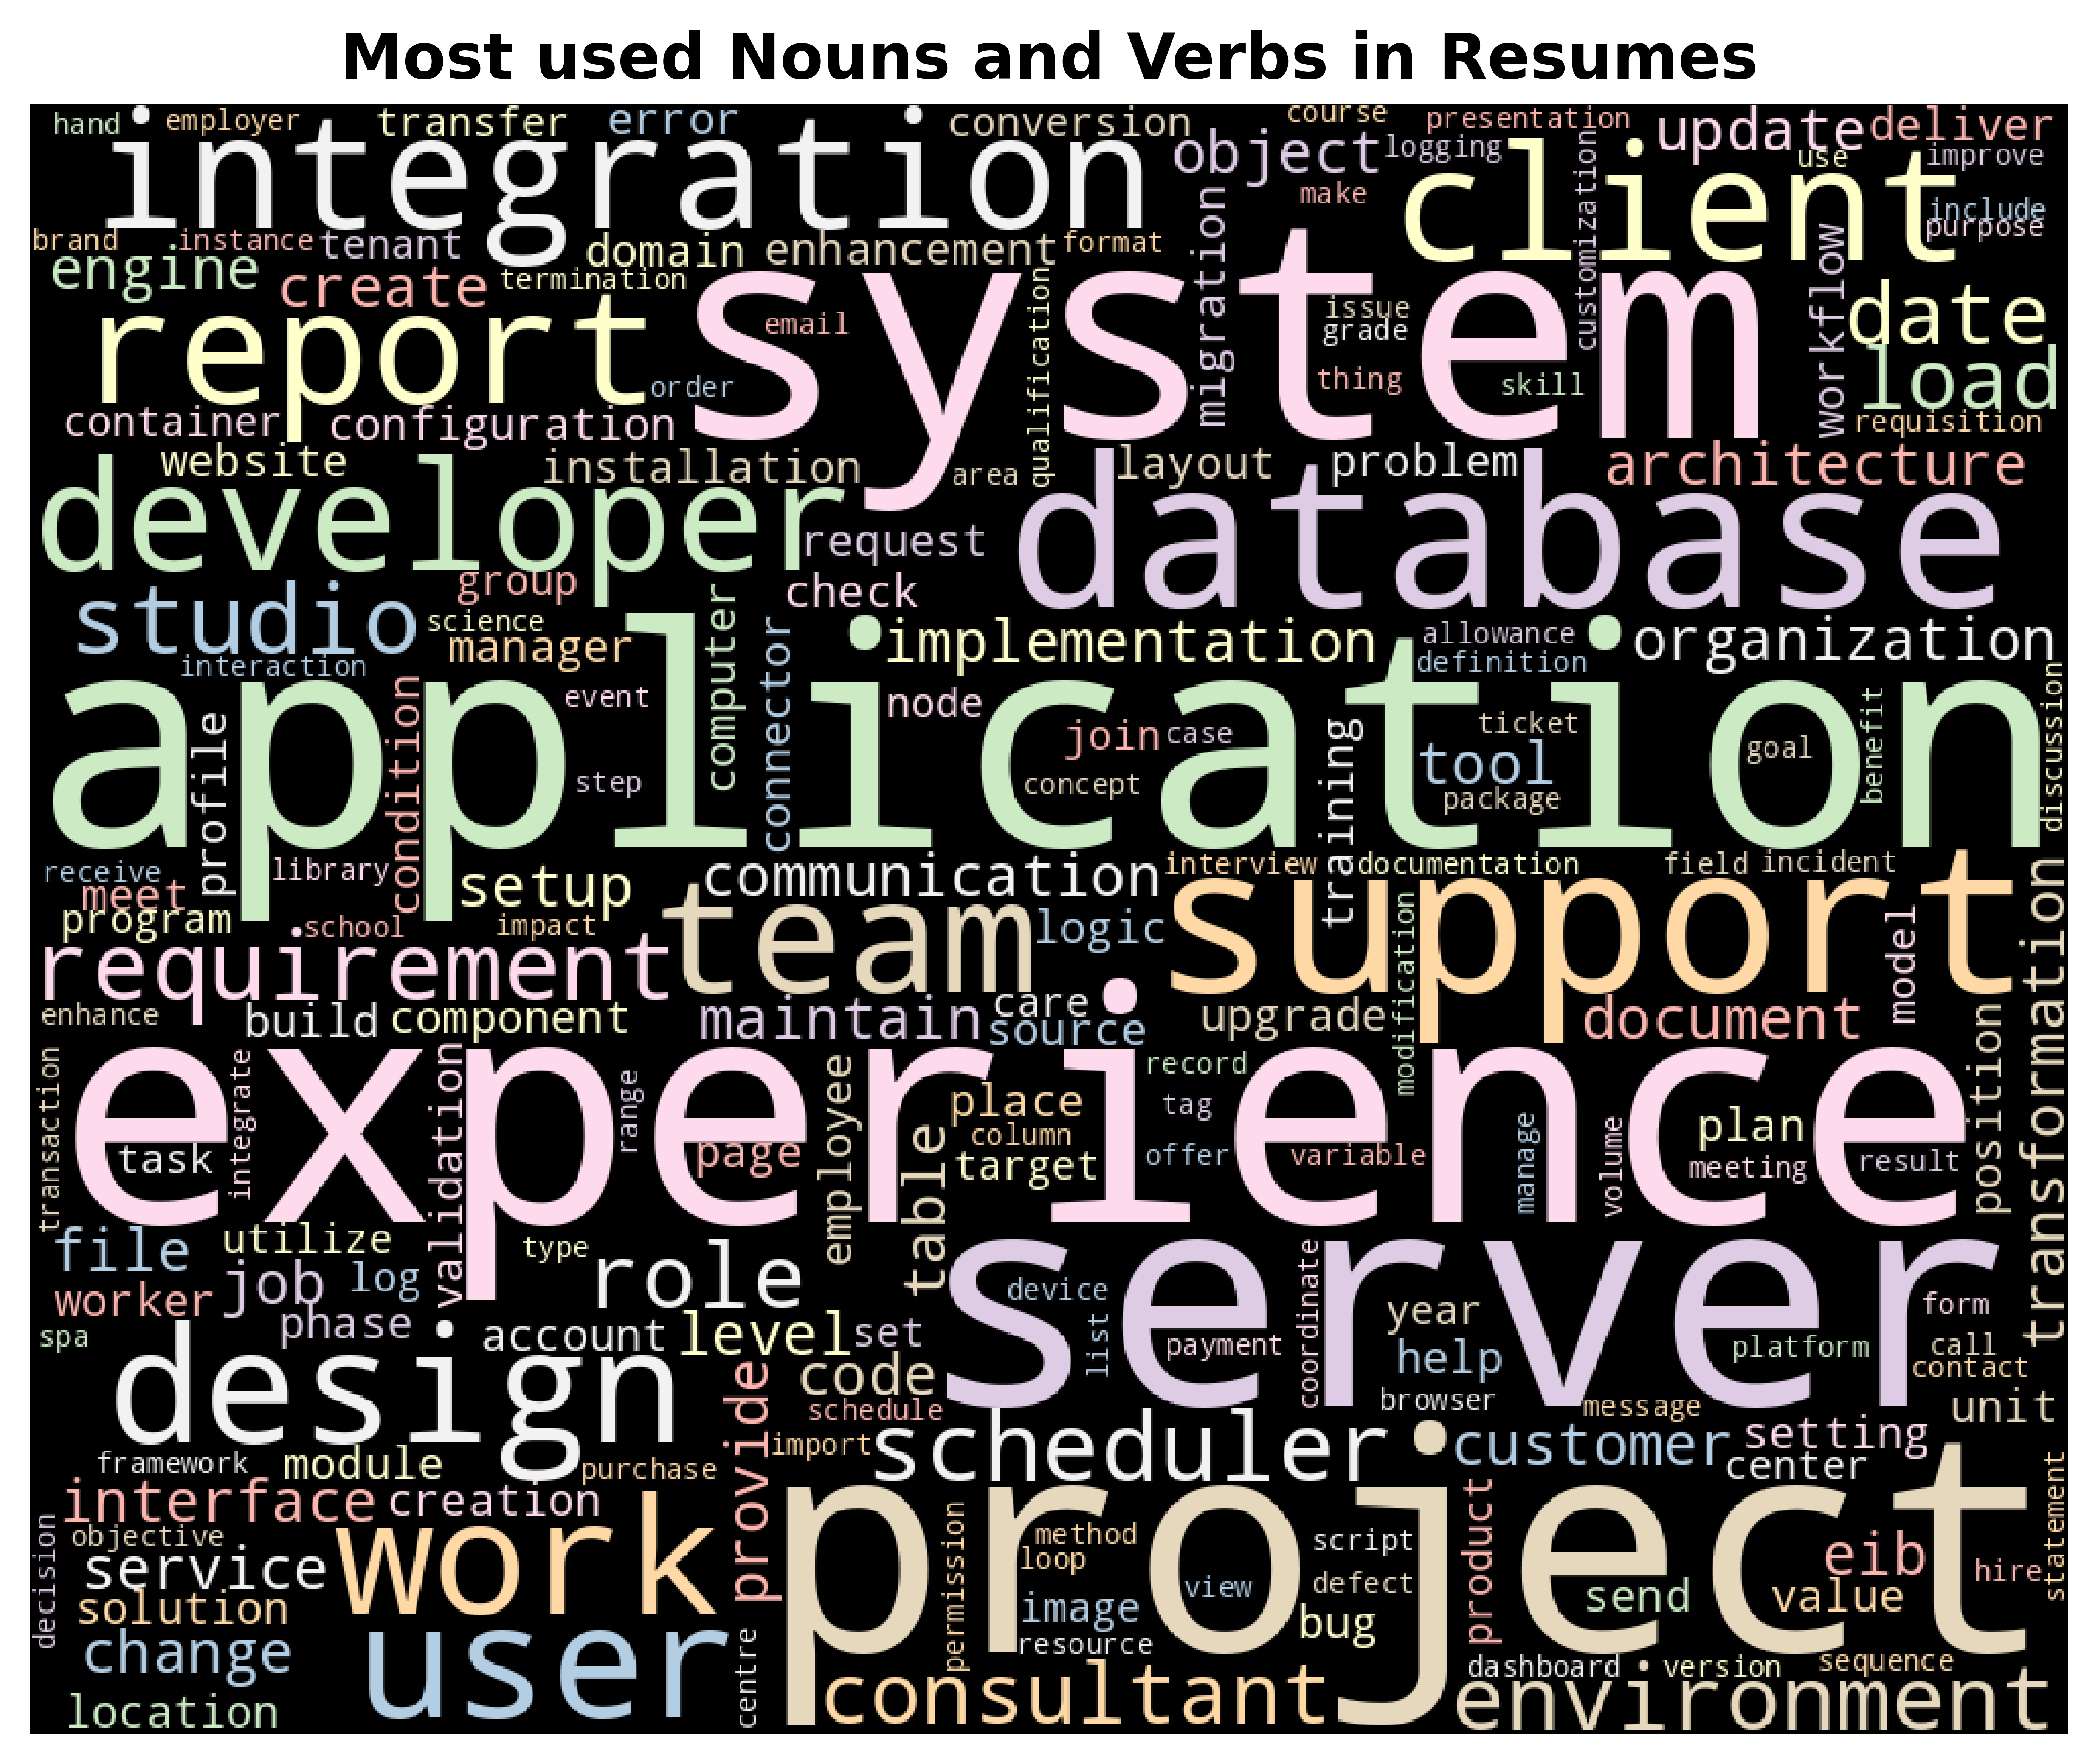

In [35]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

# B. Exploratory Data Analytics (EDA)

In [36]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 6.9 MB/s eta 0:00:006.0 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [37]:
# Import Libraries
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
file_path   = './resumes categorised'
print (os.listdir(file_path))

['React', 'SQL Developer Lightning insight', 'Peoplesoft resumes', 'internship', 'workday resumes', 'Reactjs']


In [39]:
file_path   = './resumes categorised/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [40]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52
Total Number of Files =  79


# B1.1 Type of File Format

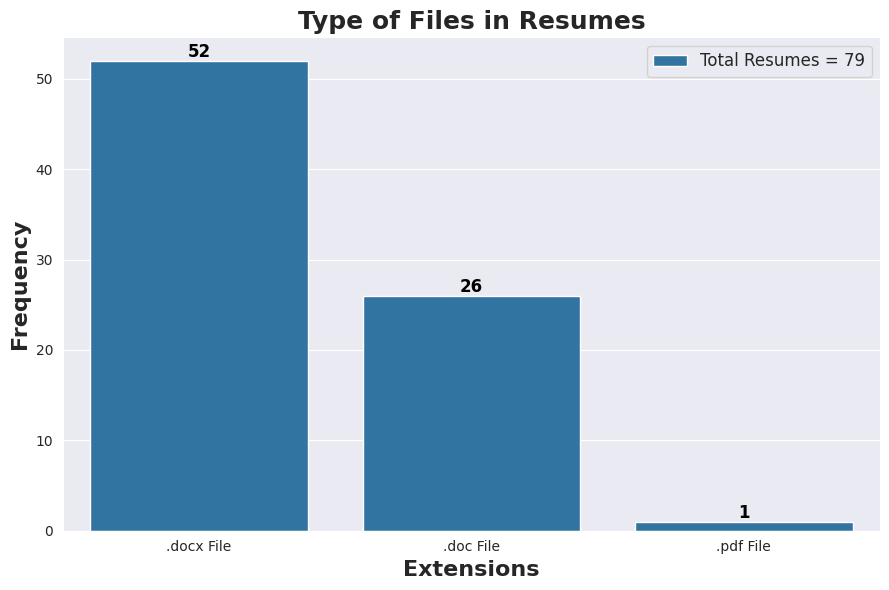

In [41]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)],
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

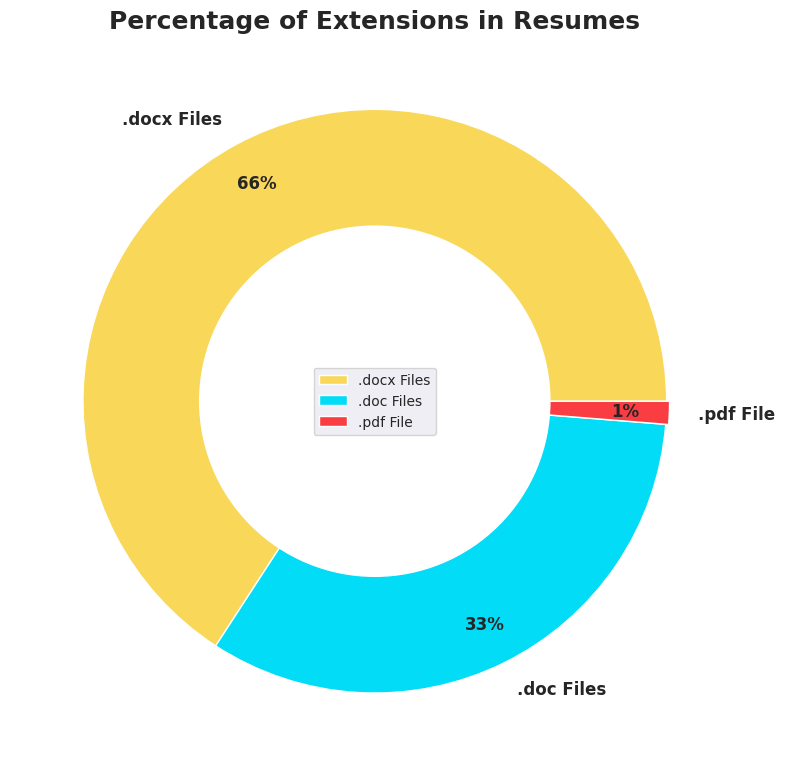

In [42]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# B2. Extract Resumes by Profile Category

In [43]:
file_path   = './resumes categorised/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [44]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,React,React Developer_Deepakreddy.docx
1,React,React Dev_Krishna Kanth.docx
2,React,React Developer_Vinay Reddy.doc
3,React,React Developer_Thirupathiamma.docx
4,React,React Developer_PavasGoswami.doc
...,...,...
74,Reactjs,Reactjs Developer_Shaik Abdul Sharuk_Musquare ...
75,Reactjs,Reactjs Developer_M Lokesh Babu_Musquare Techn...
76,Reactjs,Reactjs Developer_Ranga Gaganam_Musquare Techn...
77,Reactjs,Reactjs Developer_M Lokesh.docx


In [45]:
resume_data.Profile.value_counts().index

Index(['workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight', 'React', 'Reactjs', 'internship'],
      dtype='object', name='Profile')

In [46]:
resume_data.Profile.value_counts()

Profile
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
React                              11
Reactjs                            11
internship                          2
Name: count, dtype: int64

# B2.1 Number of Total Resumes

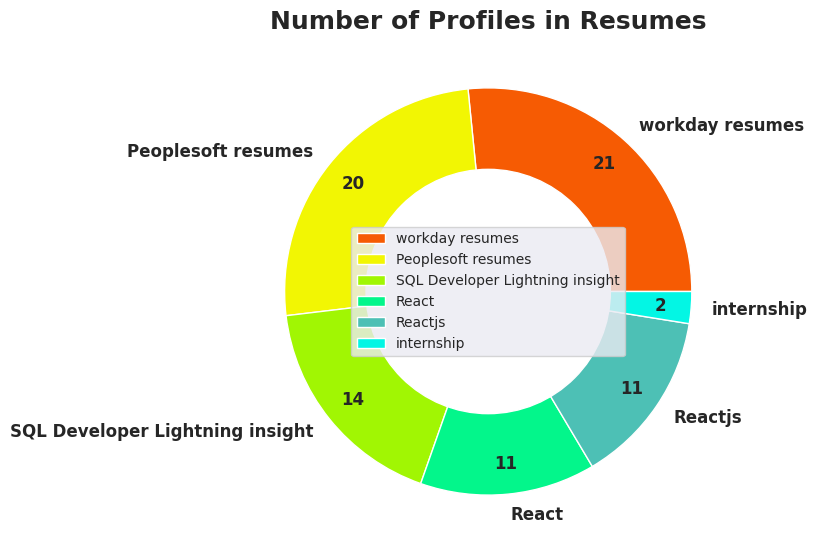

In [47]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [48]:
# fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
# ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), data= resume_data,
#                  ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

# axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
# axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
# plt.xticks(rotation = 10)
# plt.legend(loc='best', fontsize= 'x-large')
# plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

# for i in ax.containers:
#     ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
# pylab.rcParams.update(rcParams)
# fig.tight_layout()
# plt.show()

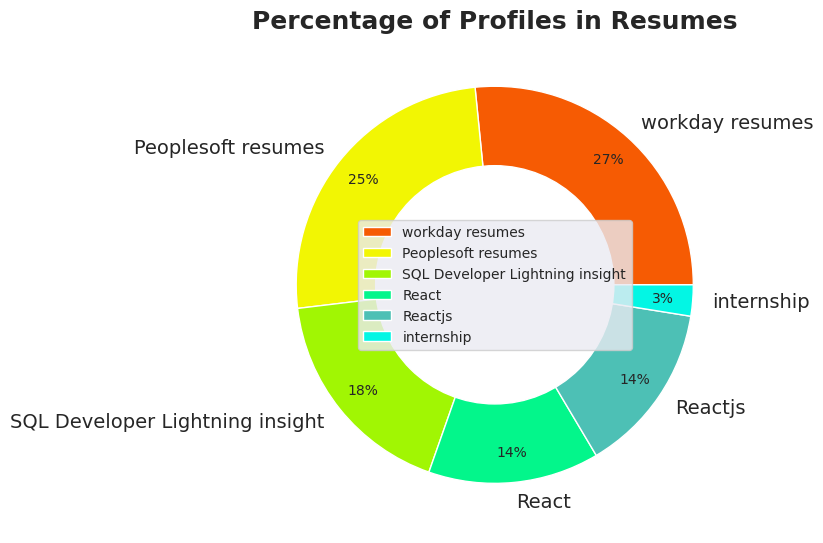

In [49]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B', '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110']
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, 
        startangle= 0)

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# B3. Reading a Resume File

In [50]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('./resumes categorised/React/React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

# B4. Data Exploration

In [51]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,workday resumes,917,6010,215,4,chinna subbarayudu dob march nationality india...
1,workday resumes,640,4289,125,1,name gopi krishna reddy professional summery w...
2,workday resumes,1408,5317,156,2,himaja career objective work towards achieving...
3,workday resumes,427,3533,110,3,jyoti verma years experience workday functiona...
4,workday resumes,1210,6785,214,1,mooraboyina guravaiah workday integration spec...
5,workday resumes,493,3930,100,1,venkata saikrishna workday consultant profssio...
6,workday resumes,1268,8655,340,7,rahul techno functional consultant professiona...
7,workday resumes,687,5381,156,1,ramesh workday hcm consultant professional sum...
8,workday resumes,979,7309,228,1,workday hcm fcm name kumar role workday consul...
9,workday resumes,990,6324,191,6,seeking suitable positions workday hcm techno ...


# B4.1 N-grams

In [52]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['name']),
 WordList(['gopi']),
 WordList(['krishna']),
 WordList(['reddy']),
 WordList(['professional']),
 WordList(['summery']),
 WordList(['working']),
 WordList(['workday']),
 WordList(['consultant']),
 WordList(['years']),
 WordList(['workday']),
 WordList(['consultant']),
 WordList(['good']),
 WordList(['experience']),
 WordList(['report']),
 WordList(['writing']),
 WordList(['integration']),
 WordList(['hcm']),
 WordList(['knowledge']),
 WordList(['software'])]

In [53]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['name', 'gopi']),
 WordList(['gopi', 'krishna']),
 WordList(['krishna', 'reddy']),
 WordList(['reddy', 'professional']),
 WordList(['professional', 'summery']),
 WordList(['summery', 'working']),
 WordList(['working', 'workday']),
 WordList(['workday', 'consultant']),
 WordList(['consultant', 'years']),
 WordList(['years', 'workday']),
 WordList(['workday', 'consultant']),
 WordList(['consultant', 'good']),
 WordList(['good', 'experience']),
 WordList(['experience', 'report']),
 WordList(['report', 'writing']),
 WordList(['writing', 'integration']),
 WordList(['integration', 'hcm']),
 WordList(['hcm', 'knowledge']),
 WordList(['knowledge', 'software']),
 WordList(['software', 'development'])]

In [54]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['name', 'gopi', 'krishna']),
 WordList(['gopi', 'krishna', 'reddy']),
 WordList(['krishna', 'reddy', 'professional']),
 WordList(['reddy', 'professional', 'summery']),
 WordList(['professional', 'summery', 'working']),
 WordList(['summery', 'working', 'workday']),
 WordList(['working', 'workday', 'consultant']),
 WordList(['workday', 'consultant', 'years']),
 WordList(['consultant', 'years', 'workday']),
 WordList(['years', 'workday', 'consultant']),
 WordList(['workday', 'consultant', 'good']),
 WordList(['consultant', 'good', 'experience']),
 WordList(['good', 'experience', 'report']),
 WordList(['experience', 'report', 'writing']),
 WordList(['report', 'writing', 'integration']),
 WordList(['writing', 'integration', 'hcm']),
 WordList(['integration', 'hcm', 'knowledge']),
 WordList(['hcm', 'knowledge', 'software']),
 WordList(['knowledge', 'software', 'development']),
 WordList(['software', 'development', 'life'])]

In [55]:
resume_data['Resume_Details']

0     chinna subbarayudu dob march nationality india...
1     name gopi krishna reddy professional summery w...
2     himaja career objective work towards achieving...
3     jyoti verma years experience workday functiona...
4     mooraboyina guravaiah workday integration spec...
5     venkata saikrishna workday consultant profssio...
6     rahul techno functional consultant professiona...
7     ramesh workday hcm consultant professional sum...
8     workday hcm fcm name kumar role workday consul...
9     seeking suitable positions workday hcm techno ...
10    vinay kumar workday functional consultant expe...
11    anil kumar maddukuri sql msbi developer summar...
12    aradhana tripathi current location gachibowli ...
13    buddha vamsi career objective years experience...
14    resume name neeraj mishra year month experienc...
15    sql server developer syam kumar professional s...
16    raju pavana kumari professional summary years ...
17    resume ramalakshmi career objective profes

# B4.2 Top 20 most used words in Resumes

## B4.2.1 Using the Word Cloud

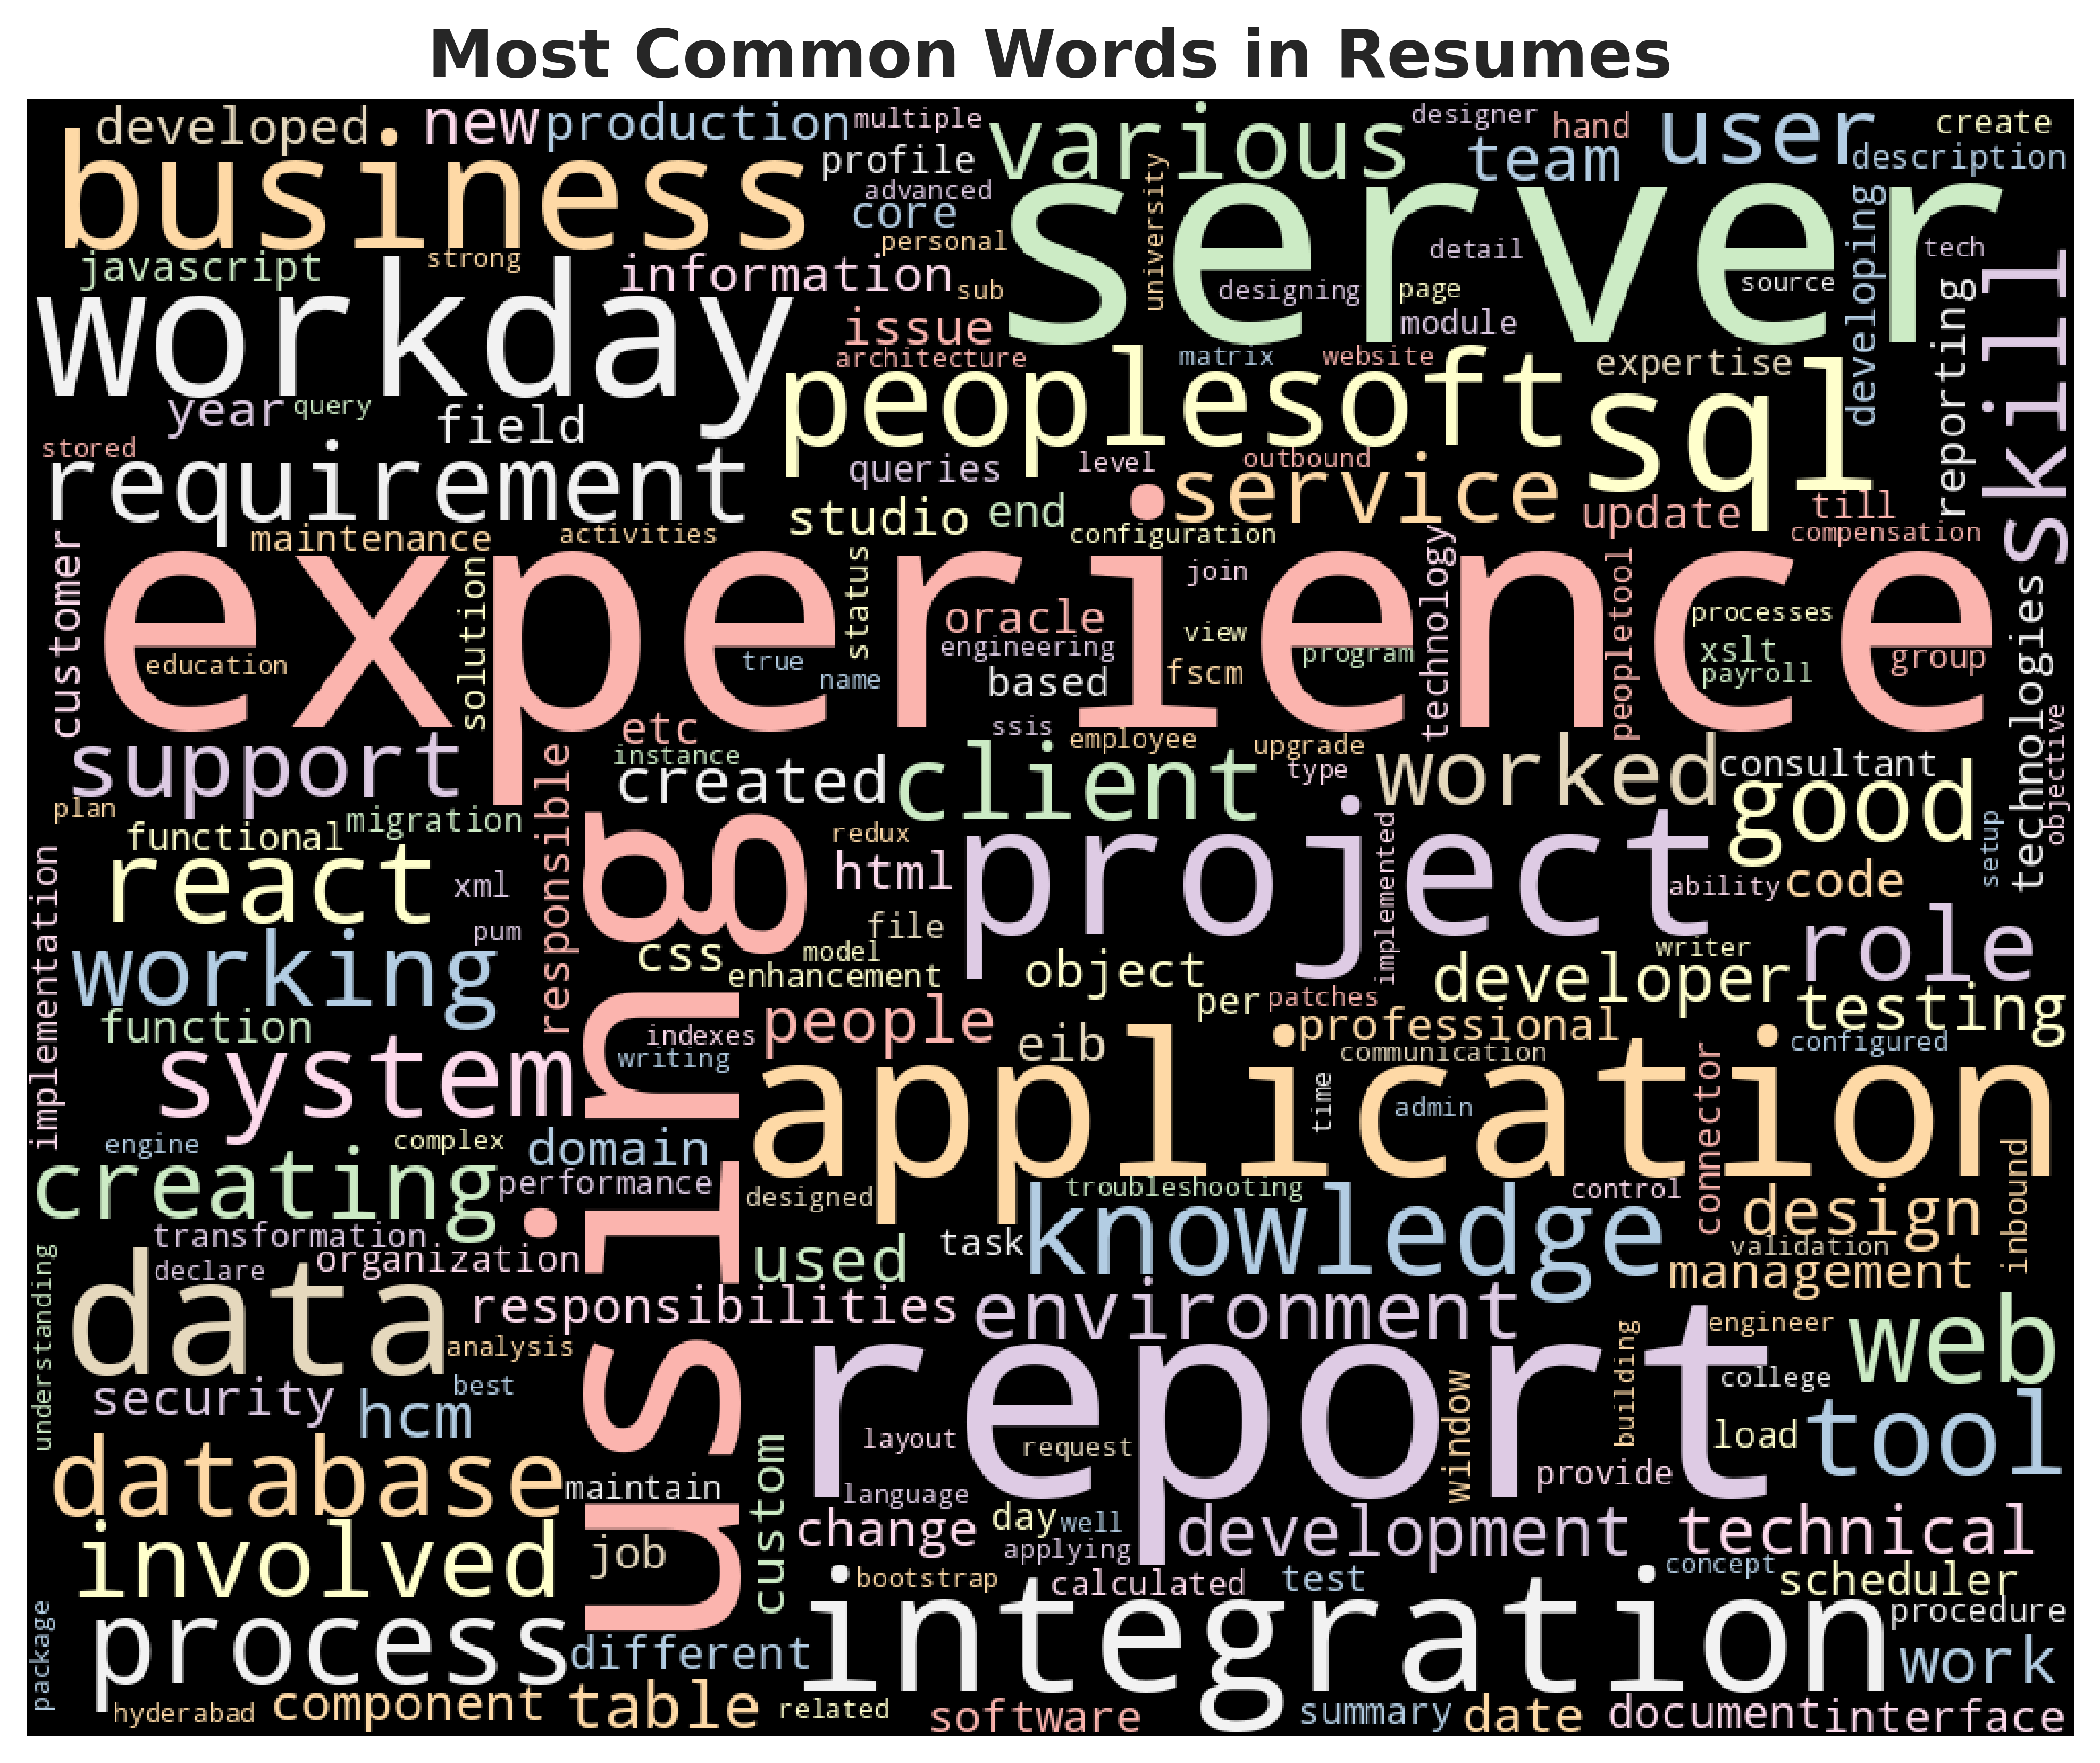

In [56]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

# C. Model Buidling

# C1. Import Library 

In [57]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:02

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score


import warnings
warnings.filterwarnings('ignore')

# C2. Load Data

# C2.1 Word2Vec vectorizer

In [59]:
! pip install gensim scikit-learn nltk



[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [60]:
!pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
x_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.09973301, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.02809337, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06994608, ..., 0.        , 0.        ,
        0.        ]])

In [63]:
import gensim

ImportError: cannot import name 'triu' from 'scipy.linalg' (/home/its_relative/virEnvs/py39/lib/python3.9/site-packages/scipy/linalg/__init__.py)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ensure you have downloaded necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Example data: resumes and their corresponding categories
documents = [
    "Experienced software engineer with a background in Java and Python.",
    "Project manager with PMP certification and agile experience.",
    "Data scientist skilled in machine learning and data analysis.",
    # Add more resumes
]
labels = ["Software Engineer", "Project Manager", "Data Scientist"]  # Corresponding categories

# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

preprocessed_documents = [preprocess(doc) for doc in documents]


ImportError: cannot import name 'triu' from 'scipy.linalg' (/home/its_relative/virEnvs/py3res/lib/python3.12/site-packages/scipy/linalg/__init__.py)

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details
0,workday resumes,917,6010,215,4,chinna subbarayudu dob march nationality india...
1,workday resumes,640,4289,125,1,name gopi krishna reddy professional summery w...
2,workday resumes,1408,5317,156,2,himaja career objective work towards achieving...
3,workday resumes,427,3533,110,3,jyoti verma years experience workday functiona...
4,workday resumes,1210,6785,214,1,mooraboyina guravaiah workday integration spec...


# C3. Data Preprocessing

## 3.1 LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category1"])

resume_data

,Category1,Word_Count,Char_Count,Stopwords,Numerics,Resume_Details,LebelEncoding
0,workday resumes,917,6010,215,4,chinna subbarayudu dob march nationality india...,5
1,workday resumes,640,4289,125,1,name gopi krishna reddy professional summery w...,5
2,workday resumes,1408,5317,156,2,himaja career objective work towards achieving...,5
3,workday resumes,427,3533,110,3,jyoti verma years experience workday functiona...,5
4,workday resumes,1210,6785,214,1,mooraboyina guravaiah workday integration spec...,5
5,workday resumes,493,3930,100,1,venkata saikrishna workday consultant profssio...,5
6,workday resumes,1268,8655,340,7,rahul techno functional consultant professiona...,5
7,workday resumes,687,5381,156,1,ramesh workday hcm consultant professional sum...,5
8,workday resumes,979,7309,228,1,workday hcm fcm name kumar role workday consul...,5
9,workday resumes,990,6324,191,6,seeking suitable positions workday hcm techno ...,5


In [ ]:
resume_data.describe()

,Word_Count,Char_Count,Stopwords,Numerics,LebelEncoding
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,655.346154,4037.557692,124.153846,3.730769,2.365385
std,422.153484,2397.611625,84.658341,3.242581,1.771549
min,115.000000,994.000000,32.000000,0.000000,0.000000
25%,360.250000,2618.000000,65.500000,1.000000,1.000000
50%,533.000000,3633.500000,111.500000,3.000000,2.000000
75%,890.000000,5089.000000,151.750000,5.000000,3.250000
max,2508.000000,15339.000000,519.000000,16.000000,5.000000


In [ ]:
resume_data.isnull().sum()

Category1         0
Word_Count        0
Char_Count        0
Stopwords         0
Numerics          0
Resume_Details    0
LebelEncoding     0
dtype: int64

# C4. Model Building

## C4.1 Train - Test Split

In [ ]:
x = resume_data['Resume_Details'].values
y = resume_data['Category1'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((39,), (13,))

# C4.2 TF-IDF Vectorization

In [ ]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [ ]:
x_train_wrd2vec = x_train
x_test_wrd2vec = x_test
y_train_wrd2vec = y_train
y_test_word2vec = y_test

In [ ]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)
x_train.shape, x_test.shape

((39, 2583), (13, 2583))

In [ ]:
print(y_train),print(y_test)

['internship' 'SQL Developer Lightning insight' 'React' 'Reactjs' 'React'
 'Peoplesoft resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'Reactjs' 'Peoplesoft resumes'
 'Reactjs' 'workday resumes' 'internship' 'React' 'React'
 'Peoplesoft resumes' 'Reactjs' 'Reactjs' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'workday resumes' 'React'
 'workday resumes' 'Peoplesoft resumes' 'Peoplesoft resumes'
 'workday resumes' 'SQL Developer Lightning insight' 'React' 'Reactjs'
 'SQL Developer Lightning insight' 'React' 'workday resumes'
 'workday resumes' 'SQL Developer Lightning insight'
 'SQL Developer Lightning insight' 'workday resumes' 'workday resumes'
 'SQL Developer Lightning insight' 'Reactjs']
['Reactjs' 'Peoplesoft resumes' 'workday resumes' 'Peoplesoft resumes'
 'SQL Developer Lightning insight' 'SQL Developer Lightning insight'
 'React' 'Reactjs' 'React' 'workday resumes' 'Peoplesoft resumes'
 'workday resumes' 'SQL Developer Lightning insight']


(None, None)

# C5. Classification Models

## C5.1 KNN Classifier

In [ ]:
x_train.shape

: 

In [ ]:
x_test.shape

: 

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=25)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

: 

## C5.2 Decision Tree Classifier

In [ ]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

: 

## C5.3 Random Forest Classifier

In [ ]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

: 

## C5.4 Support Vectore Machine (SVM) Classifier

In [ ]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

: 

## C5.5 Logistic Regression

In [ ]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

: 

## C5.6 Bagging Classifier

In [ ]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

: 

## C5.7 AdaBoost Classifier

In [ ]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

: 

## C5.8 Gradient Boosting Classifier

In [ ]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

: 

## C5.9 Naive Bayes Classifier

In [ ]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

: 

# C6. Model Evaluation

In [ ]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

: 

In [ ]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

: 

## C6.1 Train and Test Accuracy Plot 

In [ ]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

: 

# D. Model Deployment

## D1. Pickle File

In [ ]:
import pickle
filename = 'modelSAP.pkl'
pickle.dump(model_RF,open(filename,'wb'))
pickle.dump(tfidf_vector,open(filename,'wb'))

: 

: 